In [1]:
import matplotlib.pyplot as plt
%cd c:\Users\thibault.simonetto\repo\moeva
%load_ext autoreload
%autoreload 2

c:\Users\thibault.simonetto\repo\moeva


In [2]:

from src.utils.in_out import json_from_dir
import pandas as pd
from src.utils.metrics import parse_metrics
import seaborn as sns

In [21]:
metrics = json_from_dir("./out/attacks/url/rq1") + json_from_dir("./out/attacks/url/rq2") + json_from_dir("./out/attacks/url/rq3")
print(f"{len(metrics)} found.")
metrics_parsed = parse_metrics(metrics)
metrics_df = pd.DataFrame(metrics_parsed)
metrics_df

44 found.


,n_input,config_hash,project_name,budget,time,model,reconstruction,attack_name,eps,o1,o2,o3,o4,o5,o6,o7
0,-1,42c30af223bb246f7b225a532c5120f1,url,100,1562.721922,baseline,False,moeva,0.01,1.000000,0.903454,1.0000,0.902569,1.000000,0.147033,0.147033
1,-1,42c30af223bb246f7b225a532c5120f1,url,100,1562.721922,baseline,False,moeva,0.05,1.000000,0.903454,1.0000,0.902569,1.000000,0.179805,0.179805
2,-1,42c30af223bb246f7b225a532c5120f1,url,100,1562.721922,baseline,False,moeva,0.10,1.000000,0.903454,1.0000,0.902569,1.000000,0.201063,0.201063
3,-1,42c30af223bb246f7b225a532c5120f1,url,100,1562.721922,baseline,False,moeva,0.20,1.000000,0.903454,1.0000,0.902569,1.000000,0.402126,0.402126
4,-1,637d9f2da28b73ba8ffe28cf6ea734bc,url,100,2.119966,baseline,False,constraints+flip+adaptive_eps_step,0.05,1.000000,0.159433,1.0000,0.159433,1.000000,0.159433,0.159433
5,-1,7b1175d75bcb26c9e92cc7f30682ec84,url,100,2.031929,baseline,False,constraints+flip+adaptive_eps_step,0.10,1.000000,0.186891,1.0000,0.186891,1.000000,0.186891,0.186891
6,-1,b4df83fc68a02b001893b948c407cf1f,url,100,1.992556,baseline,False,constraints+flip+adaptive_eps_step,0.01,1.000000,0.144376,1.0000,0.144376,1.000000,0.144376,0.144376
7,-1,ccfbe51cfdc6c4af2150127ff1e515b9,url,100,2.084936,baseline,False,constraints+flip+adaptive_eps_step,0.20,1.000000,0.248893,1.0000,0.248893,1.000000,0.248893,0.248893
8,-1,08bfec2968f826fd06e15468b5c0b30b,url,100,2.028294,baseline,False,constraints+flip,0.05,1.000000,0.156776,1.0000,0.156776,1.000000,0.156776,0.156776
9,-1,ab1f4e4ac4bc02b6daf6a68abea310f7,url,100,1.961388,baseline,False,constraints+flip,0.20,1.000000,0.240035,1.0000,0.240035,1.000000,0.240035,0.240035


In [17]:
def graph_group_by(df, col, title_cols):
    group_by_col = df.columns.to_list()
    remove_col =  ["eps", "config_hash", "time"] + [f"o{i+1}" for i in range(7)] + [col]
    group_by_col = list(filter(lambda x:  x not in remove_col, group_by_col))

    groups = df.groupby(by=group_by_col)
    print(len(groups))

    for _, group in groups:

        sns.lineplot(x="eps", y="o7",
                 hue=col,
                 data=group,)
        plt.xlabel("eps")
        plt.ylabel("Success rate")
        title = ', '.join([f"{title_col}: {group[title_col].iloc[0]}" for title_col in title_cols])
        plt.title(title)
        plt.show()


# By attack

4


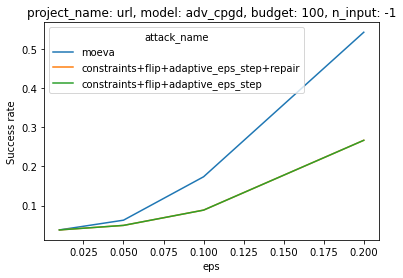

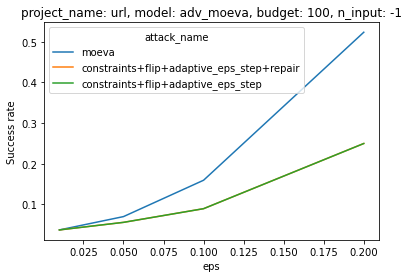

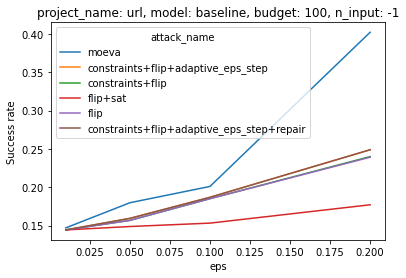

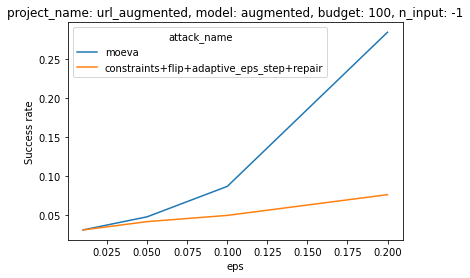

In [18]:
graph_group_by(metrics_df, "attack_name", ["project_name", "model", "budget", "n_input"])

# By defense

2


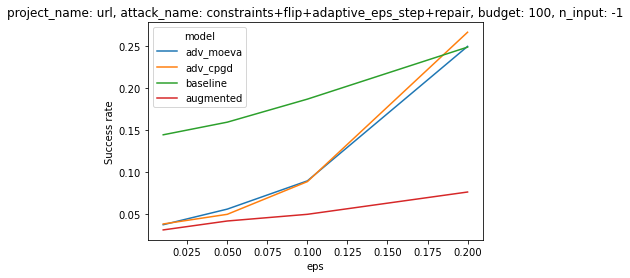

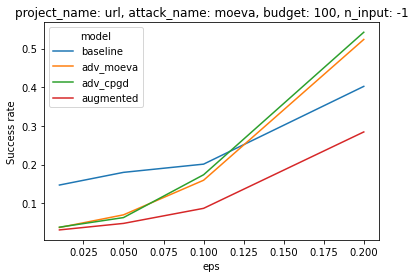

In [22]:
attack_names = ["moeva", "constraints+flip+adaptive_eps_step+repair"]
graph_group_by(metrics_df[metrics_df['attack_name'].isin(attack_names)] , "model", ["project_name", "attack_name", "budget", "n_input"])